In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from util import *
from pysmileUtil import *
import matplotlib.pyplot as plt
#import networkx as nx
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import numpy as np

import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
#information gain
#from sklearn.feature_selection import mutual_info_classif

# variable contribution
from tsquared import HotellingT2, MYTDecomposition
from xgboost import XGBRegressor


# Bayesian
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch, BicScore, TreeSearch, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pyreadr
train_normal_path = 'TEP2017R/TEP_FaultFree_Training.RData'
train_faulty_path =  'TEP2017R/TEP_Faulty_Training.RData'
 
test_normal_path = 'TEP2017R/TEP_FaultFree_Testing.RData'
test_faulty_path = 'TEP2017R/TEP_Faulty_Testing.RData'
 
train_normal = pyreadr.read_r(train_normal_path)['fault_free_training']
train_faulty = pyreadr.read_r(train_faulty_path)['faulty_training']
#test_normal = pyreadr.read_r(test_normal_path)['fault_free_testing']
#test_faulty = pyreadr.read_r(test_faulty_path)['faulty_testing']

# only keep continuous variables, xmeas_1 - xmeas_22
df_train_normal = train_normal[train_normal.simulationRun==1].iloc[:,3:25]
df_train_faulty = train_faulty[(train_faulty.simulationRun==1) & (train_faulty.faultNumber==12)].iloc[:,3:25]
#df_test_normal = test_normal[test_normal.simulationRun==1].iloc[:,3:25]
kFeatures = len(df_train_normal.columns)
feature_list = list(df_train_normal.columns)

ss = StandardScaler().set_output(transform="pandas")
ss_df_train_normal = ss.fit_transform(df_train_normal)

# TEP truths
faultToRoot = {1:'xmeas_4', 4:'xmeas_9', 5:'xmeas_22', 6:'xmeas_1', 11:'xmeas_21', 12:'xmeas_11', 14:'xmeas_9', 15:'xmeas_11'}
faultToVariables = {1:['xmeas_1', 'xmeas_4', 'xmeas_18', 'xmeas_21', 'xmeas_25', 'xmeas_26'],
                    14:['xmeas_9', 'xmeas_11', 'xmeas_21', 'xmeas_32']}
reactor = ['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 
           'xmeas_20','xmeas_21']
seperator = ['xmeas_7', 'xmeas_20', 'xmeas_21', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_22']
stripper = ['xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_22', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 
           'xmeas_19', 'xmeas_4', 'xmeas_5']

In [16]:
#import importlib
#importlib.reload(pysmileUtil)

df_train_faulty_alarm = alarm_df(df_train_normal, df_train_faulty)
BN = pysmileUtil.getBayesianNet(df_train_faulty_alarm)
#for node in BN.get_all_nodes():
#    print(print_node_info(BN, node))



[0.8201634877384196, 0.07901907356948229, 0.1008174386920981, 0.3230769230769231, 0.0, 0.676923076923077, 0.36764705882352944, 0.6323529411764706, 0.0]
[0.875, 0.058333333333333334, 0.06666666666666667, 0.4666666666666667, 0.06666666666666667, 0.4666666666666667, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727, 0.3541666666666667, 0.5833333333333334, 0.0625, 0, 0, 0, 0.04285714285714286, 0.9571428571428572, 0.0, 0.3728813559322034, 0.0, 0.6271186440677966, 0.3157894736842105, 0.0, 0.6842105263157895, 0, 0, 0]
[0.8540925266903915, 0.07473309608540925, 0.0711743772241993, 0.7719298245614035, 0.12280701754385964, 0.10526315789473684, 0.7428571428571429, 0.06666666666666667, 0.19047619047619047]
[0.7951807228915663, 0.13253012048192772, 0.07228915662650602, 0.125, 0.875, 0.0, 0.19230769230769232, 0.0, 0.8076923076923077, 0.18181818181818182, 0.0, 0.8181818181818182, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 1.0, 0.4074074074074074, 0.5925925925925926, 0.0, 0.0, 1.

In [1]:
data_train = pd.read_csv('FCC/NOC_varyingFeedFlow_outputs.csv', header=None).values
data_train = data_train[:,1:] # first column gives sampling time
df_train_normal = pd.DataFrame(data=data_train[:, :14])
df_train_normal = df_train_normal.iloc[:, df_train_normal.columns[df_train_normal.nunique() > 1]]
data_test = pd.read_csv('FCC/condEff_decrease_outputs.csv', header=None).values
data_test = data_test[:,1:]
df_train_faulty = pd.DataFrame(data=data_test[:, :14])
df_train_faulty = df_train_faulty.iloc[:, df_train_faulty.columns[df_train_faulty.nunique() > 1]]
kFeatures = len(df_train_normal.columns)
feature_list = list(df_train_normal.columns)

NameError: name 'pd' is not defined

In [3]:
data_train = pd.read_csv('FCC/NOC_varyingFeedFlow_outputs.csv', header=None).values
data_train = data_train[:,1:] # first column gives sampling time
N = data_train.shape[0]
m = data_train.shape[1]

scaler = StandardScaler()
scaler.fit(data_train)

data_train_normal = scaler.transform(data_train)
pca = PCA()
score_train = pca.fit_transform(data_train_normal)

explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

n_comp = np.argmax(cum_explained_variance >= 95) + 1
print('Number of PCs cumulatively explaining atleast 95% variance: ', n_comp)
score_train_reduced = score_train[:,0:n_comp]

# reconstruct original data
V_matrix = pca.components_.T
P_matrix = V_matrix[:,0:n_comp] 

data_train_normal_reconstruct = np.dot(score_train_reduced, P_matrix.T)

# calculate T2 for training data
k = n_comp

lambda_k = np.diag(pca.explained_variance_[0:k]) # eigenvalue = explained variance
lambda_k_inv = np.linalg.inv(lambda_k)

T2_train = np.zeros((N,))

for i in range(N):
    T2_train[i] = np.dot(np.dot(score_train_reduced[i,:],lambda_k_inv),score_train_reduced[i,:].T)
    
T2_CL = np.percentile(T2_train, 99)

#% calculate Q for training data
error_train = data_train_normal - data_train_normal_reconstruct
Q_train = np.sum(error_train*error_train, axis = 1)
Q_CL = np.percentile(Q_train, 99)

#methdo to draw dashed line 
#plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)

Number of PCs cumulatively explaining atleast 95% variance:  4


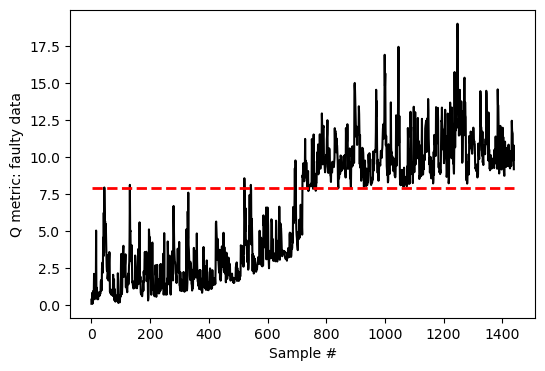

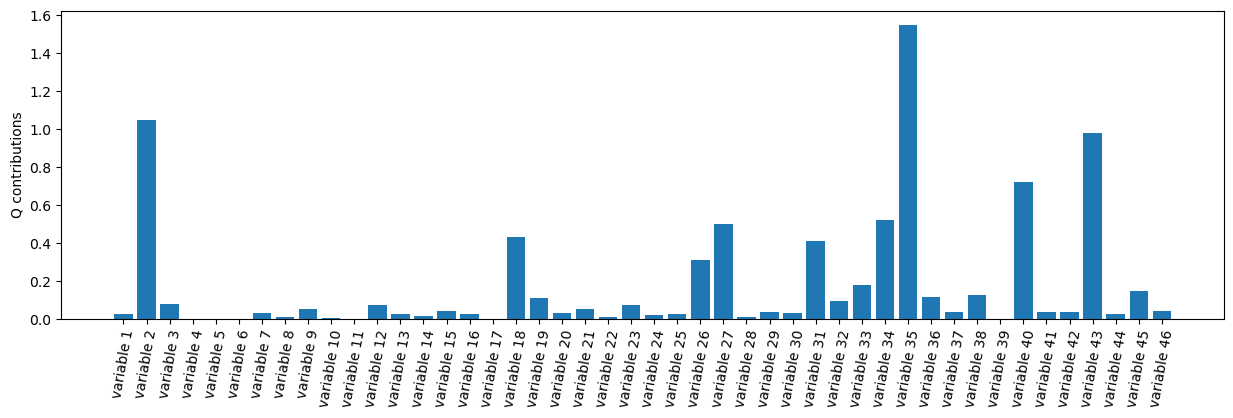

In [4]:
data_test = pd.read_csv('FCC/condEff_decrease_outputs.csv', header=None).values
data_test = data_test[:,1:]

data_test_normal = scaler.transform(data_test) # using scaling parameters from training data

# compute scores and reconstruct
score_test = pca.transform(data_test_normal)
score_test_reduced = score_test[:,0:k]

data_test_normal_reconstruct = np.dot(score_test_reduced, P_matrix.T)

#calculate T2_test
T2_test = np.zeros((data_test_normal.shape[0],))

for i in range(data_test_normal.shape[0]): # eigenvalues from training data are used
    T2_test[i] = np.dot(np.dot(score_test_reduced[i,:],lambda_k_inv),score_test_reduced[i,:].T)
    
#calculate Q_test
error_test = data_test_normal_reconstruct - data_test_normal
Q_test = np.sum(error_test*error_test, axis = 1)

# plot Q_test and Q_train with CL
plt.figure(figsize=[6,4])
plt.plot(Q_test, color='black')
plt.plot([1,len(Q_test)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: faulty data')
plt.show()

#%% Q contribution
sample = 750

error_test_sample = error_test[sample-1,]
Q_contri = error_test_sample*error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

C:\Users\paulo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


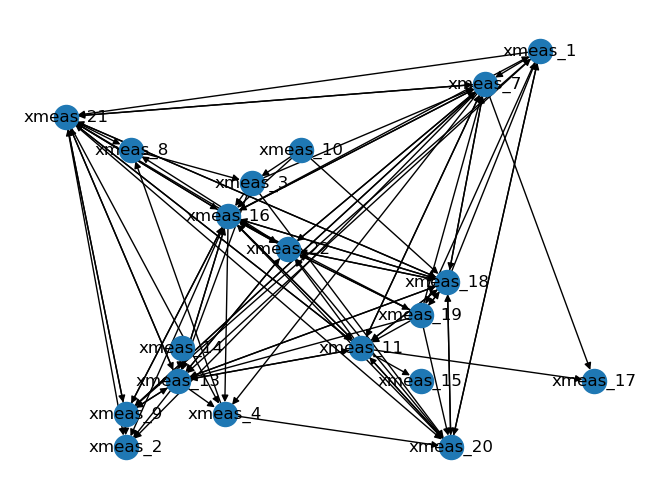

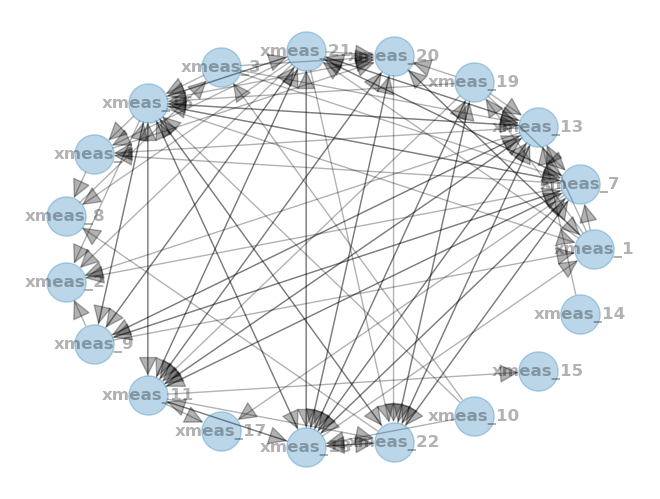

In [5]:
#df_train_normal = pd.DataFrame(data=data_train[:, :14])
#df_train_normal = df_train_normal.iloc[:, df_train_normal.columns[df_train_normal.nunique() > 1]]
#kFeatures = len(df_train_normal.columns)
#feature_list = list(df_train_normal.columns)
GCTable = grangerCausalityTable(df_train_normal, 4, 0.0001)
edges = getTableEdges(GCTable, feature_list)
nodes = getNodesFromEdges(edges)
drawBN(edges)

C:\Users\paulo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


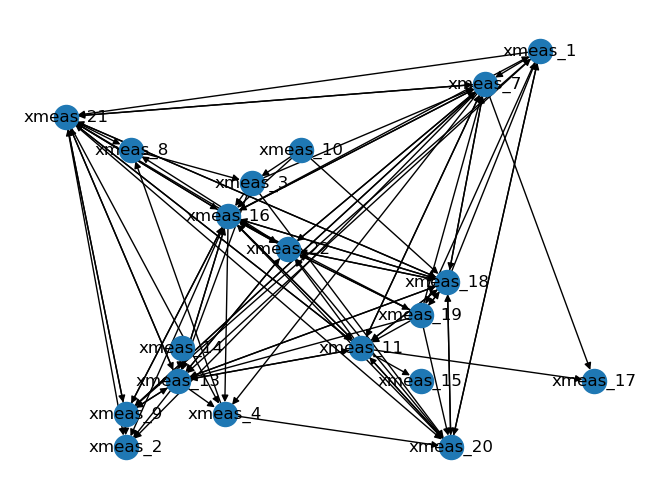

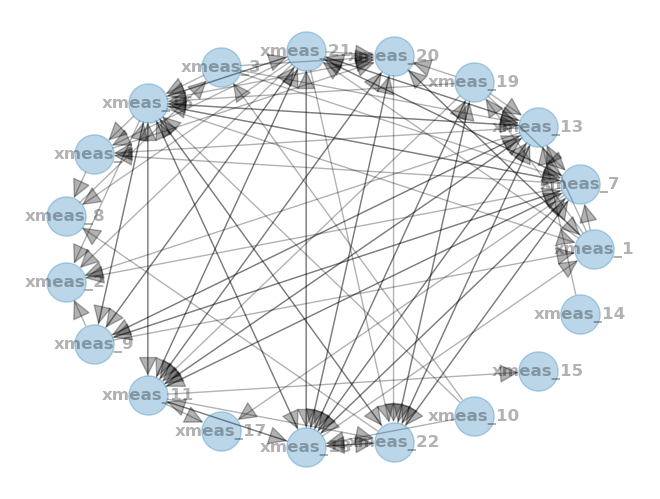

In [3]:
GCTable = grangerCausalityTable(df_train_normal, 4, 0.0001)
edges = getTableEdges(GCTable, feature_list)
nodes = getNodesFromEdges(edges)
drawBN(edges)

In [12]:
"""    print("Posteriors with no evidence set:")  
    net.update_beliefs()
    #print_all_posteriors(net)
    #change_evidence_and_update(net, "Forecast", "Poor")
    #print_all_posteriors(net)  
    for h in net.get_all_nodes():       
        print_node_info(net, h)      """


'    print("Posteriors with no evidence set:")  \n    net.update_beliefs()\n    #print_all_posteriors(net)\n    #change_evidence_and_update(net, "Forecast", "Poor")\n    #print_all_posteriors(net)  \n    for h in net.get_all_nodes():       \n        print_node_info(net, h)      '

In [18]:
from pysmileUtil import *
net = pysmile.Network()
e = create_cpt_node(net, "Economy", "State of the economy",            ["Up","Flat","Down"])
s = create_cpt_node(net,            "Success", "Success of the venture",            ["Success","Failure"])
f = create_cpt_node(net,            "Forecast", "Expert forecast",            ["Good","Moderate","Poor"])
net_nodes = [e, s, f]
net.add_arc(e, s)
net.add_arc(s, f) # we can also use node identifiers when creating arcs          
net.add_arc("Economy", "Forecast");               
economyDef = [            0.2, # P(Economy=U)           
              0.7, # P(Economy=F)           
              0.1  # P(Economy=D)        
             ]
net.set_node_definition(e, economyDef)     
successDef = [            0.3, # P(Success=S|Economy=U) 
              0.7, # P(Success=F|Economy=U)        
              0.2, # P(Success=S|Economy=F)        
              0.8, # P(Success=F|Economy=F)        
              0.1, # P(Success=S|Economy=D)       
              0.9  # P(Success=F|Economy=D)        
             ]      
net.set_node_definition(s, successDef)           
forecastDef = [            0.70, # P(Forecast=G|Success=S,Economy=U)    
               0.29, # P(Forecast=M|Success=S,Economy=U)      
               0.01, # P(Forecast=P|Success=S,Economy=U)              
               0.65, # P(Forecast=G|Success=S,Economy=F)           
               0.30, # P(Forecast=M|Success=S,Economy=F)         
               0.05, # P(Forecast=P|Success=S,Economy=F)        
               0.60, # P(Forecast=G|Success=S,Economy=D)       
               0.30, # P(Forecast=M|Success=S,Economy=D)      
               0.10, # P(Forecast=P|Success=S,Economy=D)      
               0.15,  # P(Forecast=G|Success=F,Economy=U)     
               0.30, # P(Forecast=M|Success=F,Economy=U)      
               0.55, # P(Forecast=P|Success=F,Economy=U)     
               0.10, # P(Forecast=G|Success=F,Economy=F)     
               0.30, # P(Forecast=M|Success=F,Economy=F)     
               0.60, # P(Forecast=P|Success=F,Economy=F)     
               0.05, # P(Forecast=G|Success=F,Economy=D)
               0.25, # P(Forecast=G|Success=F,Economy=D)   
               0.70  # P(Forecast=G|Success=F,Economy=D)     
              ]   
net.set_node_definition(f, forecastDef)

for node in net_nodes:
    nodeDef = []
    node_id = net.get_node_id(node)
    parents = net.get_parent_ids(node)
    outcomes = net.get_outcome_ids(node)
    parents_outcomes = [net.get_outcome_ids(p) for p in parents]
    print(generate_combinations(parents_outcomes))

[[]]
[['Up'], ['Flat'], ['Down']]
[['Success', 'Up'], ['Success', 'Flat'], ['Success', 'Down'], ['Failure', 'Up'], ['Failure', 'Flat'], ['Failure', 'Down']]


In [16]:
def generate_combinations(arrays):
    def helper(arrays, index, current, result):
        if index == len(arrays):
            result.append(current.copy())
            return
        for item in arrays[index]:
            current.append(item)
            helper(arrays, index + 1, current, result)
            current.pop()

    result = []
    helper(arrays, 0, [], result)
    return result

In [31]:
net = pysmile.Network()
TETable = transferEntropyTable(df_alarm, 4, 0.05)
edges = getTableEdges(TETable, feature_list)
nodes = getNodesFromEdges(edges)
print(TETable)
net_nodes = []
for node in nodes:
    o = [str(i) for i in sorted(list(df_alarm[node].value_counts().index))]
    print(o)
    print(node)
    create_cpt_node(net, node, node, o)

for node in net.get_all_nodes():
    print(net.get_node_id(node))

[[False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False, False]]


In [ ]:
kComponents = 2
pca = PCA(kComponents)
pca.fit(ss_df_train_normal)

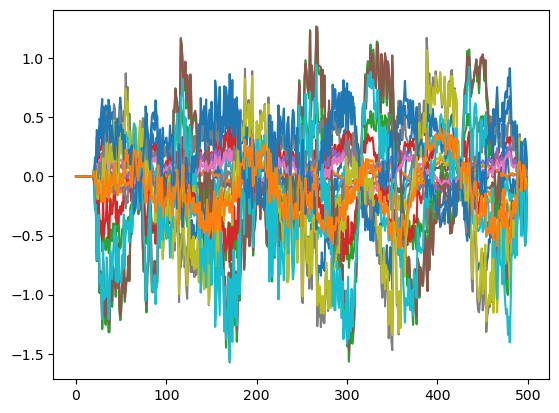

In [21]:
#KPCA
kpca = KernelPCA(n_components=kComponents, kernel='rbf', fit_inverse_transform=True)
'''
x_kpca = kpca.fit_transform(x)
x_reconstructed = kpca.inverse_transform(x_kpca)
residuals = x - x_reconstructed
print(residuals)
#plt.plot(residuals.flatten())
x2 = ss.transform(df_train_faulty,copy=None)
x2_kpca = kpca.transform(x2)
x2_reconstructed = kpca.inverse_transform(x2_kpca)
residuals2 = x2 - x2_reconstructed
plt.plot(residuals2.flatten())
'''
x_faulty = ss.transform(df_train_faulty,copy=None)
x_kpca = kpca.fit(x)
x_fault_free_reconstructed = kpca.inverse_transform(kpca.transform(x))
x_faulty_reconstructed = kpca.inverse_transform(kpca.transform(x_faulty))
residuals = x_fault_free_reconstructed - x_faulty_reconstructed
plt.plot(residuals)

In [80]:
def displayComponentStatistics(data, pca_model, kComponents):
    name = list(df_train_normal.columns)
    score = abs(pca.components_)
    print(sorted(zip(score[0], name), reverse=True)[:kComponents])
    print(sorted(zip(score[1], name), reverse=True)[:kComponents])
    print(np.sum(pca.explained_variance_ratio_[:kComponents]))

def hotelling_t_squared(data, pca_model):
    # Transform data into principal component space
    transformed_data = pca_model.transform(data)
    
    # Calculate centroid in principal component space
    centroid = np.mean(transformed_data, axis=0)
    
    # Calculate Mahalanobis distance (T^2 score) for each sample
    t_squared_scores = np.sum((transformed_data - centroid)**2 / pca_model.explained_variance_, axis=1)
    return t_squared_scores

#doesn't work
def calculate_cdc_score(data, pca_model, faulty_indices):
    # Transform data into principal component space
    transformed_data = pca_model.transform(data)
    
    # Extract relevant components and covariance matrix
    principal_components = pca_model.components_
    covariance_matrix = np.cov(transformed_data.T)
    
    # Calculate CDC scores for each faulty instance and each variable
    cdc_scores = []
    for idx in faulty_indices:
        t_squared_instance = transformed_data[idx]
        cdc_score_instance = np.zeros(len(principal_components))
        for i in range(len(principal_components)):
            contribution = np.dot(principal_components[i], np.dot(np.linalg.inv(covariance_matrix), principal_components[i].T))
            normalized_contribution = contribution / np.sum(contribution)
            cdc_score_instance[i] = normalized_contribution * t_squared_instance[i] ** 2
        cdc_scores.append(cdc_score_instance)
    return np.array(cdc_scores)

def top_ten_vars(df, pca_model):
    name = list(df.columns)
    score = abs(pca_model.components_)
    variables = set()
    for i in sorted(zip(score[0], name), reverse=True)[:5]:
        variables.add(i[1])
    for i in sorted(zip(score[1], name), reverse=True)[:5]:
        variables.add(i[1])
    variables = list(variables)
    return variables

# Freedman-Diaconis rule
def equal_width_bin(df):
    # df = df[df.simulationRun==1].iloc[:,3:25]
    # normalize dataframe
    df = (df - df.mean())/df.std()
    n = df.shape[0]
    for col in list(df.columns):
        c = df[col]
        num_bins = math.ceil((c.max() - c.min()) / (2 * (c.quantile(0.75) - c.quantile(0.25)) / (n**(1/3))))
        df[col] = pd.cut(df[col], bins=num_bins, labels=False)
    return df

#mean contribution threshold
def MCTvariables(contributions, t2_scores):
    # contributions: m x n, where m is number of samples, n is number of variables
    n = len(contributions[0])
    m = len(contributions)
    minFrequency = m * 0.05
    count = [0]*n
    variables = []
    for i in range(m):
        # change 50
        if t2_scores[i] > 50:
            contribution = contributions[i]
            mean = sum(contribution)/n
            for j in range(n):
                if contribution[j] > mean:
                    count[j] += 1
    for i in range(n):
        if count[i] > minFrequency:
            variables.append(i)
    return variables

In [13]:
import numpy as np
from sklearn.neighbors import KernelDensity

def kde_estimate(data, bandwidth=0.2):
    """
    Estimate the probability density function using Gaussian Kernel Density Estimation.

    Parameters:
        data (numpy.ndarray): Array of observations.
        bandwidth (float): Bandwidth of the kernel. Default is 0.2.

    Returns:
        sklearn.neighbors.KernelDensity: Fitted kernel density estimator.
    """
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data[:, None])
    return kde

def transfer_entropy_kde(x, y, bandwidth=0.2):
    """
    Compute transfer entropy from x to y using Gaussian Kernel Density Estimation.

    Parameters:
        x (array-like): Source time series.
        y (array-like): Target time series.
        bandwidth (float): Bandwidth of the kernel. Default is 0.2.

    Returns:
        float: Transfer entropy from x to y.
    """
    kde_x = kde_estimate(x, bandwidth=bandwidth)
    kde_y = kde_estimate(y, bandwidth=bandwidth)

    n = len(x)
    te = 0
    for i in range(n):
        joint_pdf = np.exp(kde_x.score_samples([[x[i]]]) + kde_y.score_samples([[y[i]]]))
        conditional_pdf = np.exp(kde_x.score_samples([[x[i], y[i]]]))
        te += np.log(conditional_pdf / joint_pdf)

    te /= n
    return te

# Example usage
x = np.random.randn(100)
y = 0.5 * x + np.random.randn(100)
bandwidth = 0.2
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(x[:, None])
print(kde.get_params())
#te_xy_kde = transfer_entropy_kde(x, y, bandwidth=bandwidth)
#print("Transfer entropy from x to y (using KDE):", te_xy_kde)

{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.2, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0}


In [83]:
from scipy.stats import chi2

# Obtain the threshold value from the Chi-squared distribution
threshold = chi2.ppf(0.95, kComponents)

print("Threshold for T^2 statistic (95% significance level):", threshold)

Threshold for T^2 statistic (95% significance level): 5.991464547107979


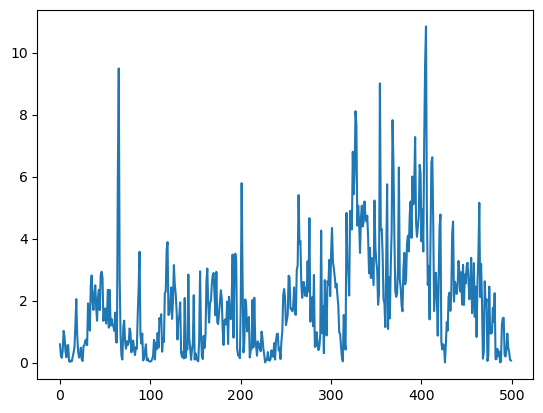

In [23]:
t_squared_scores = hotelling_t_squared(x, pca)
plt.plot(t_squared_scores)

#x_2 = ss.transform(df_train_faulty,copy=None)
#t_squared_scores = hotelling_t_squared(x_2, pca)
#plt.plot(t_squared_scores)

In [47]:
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
hotelling_t2s = np.array([xi.dot(loadings)
                            .dot(np.diag(eigenvalues ** -1))
                            .dot(loadings.T)
                            .dot(xi.T)
                          for xi in x])
t_contribution = np.array([xi.dot(loadings).dot(np.diag(np.sqrt(1/eigenvalues))).dot(loadings.T) for xi in x])
print(t_contribution)

[[ 0.06297357 -0.08151634  0.03300318 ... -0.19730104  0.21189369
  -0.22564172]
 [-0.07705201  0.0405147   0.10286442 ...  0.17110262 -0.10472827
   0.02848409]
 [-0.07178516  0.04475438  0.07888074 ...  0.16772749 -0.11585825
   0.05583957]
 ...
 [ 0.10098838 -0.05616474 -0.12740854 ... -0.22789338  0.14525737
  -0.05014261]
 [ 0.03436822 -0.00931217 -0.06706646 ... -0.06592061  0.02385821
   0.02391335]
 [-0.04851838  0.03238486  0.04814763 ...  0.11590001 -0.08388042
   0.04667147]]
2.782028162197751


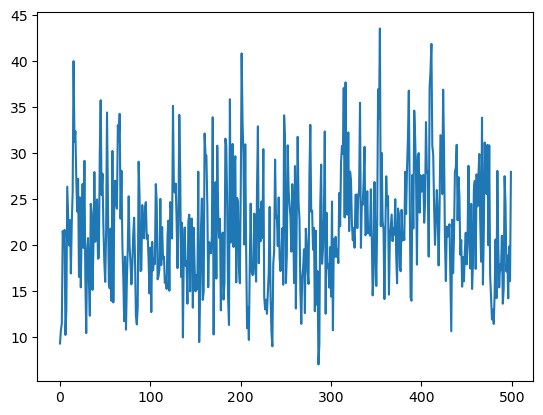

In [22]:
hotelling = HotellingT2().fit(x)
x_t2_scores = hotelling.score_samples(x)
plt.plot(x_t2_scores)

[0, 3, 10, 15, 17, 18, 19]
[0, 3, 6, 10, 12, 15, 17, 18, 19]
[10, 12, 19, 21]


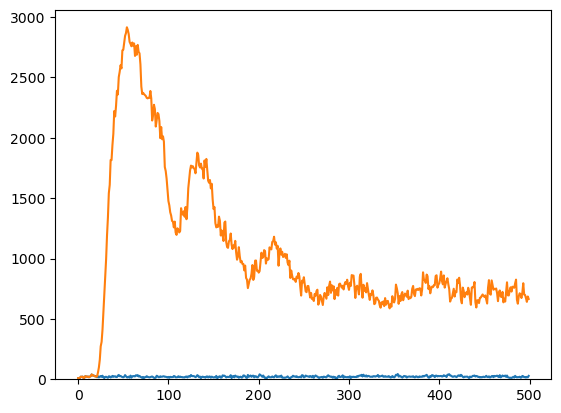

In [125]:
x2 = ss.transform(train_faulty[(train_faulty.simulationRun==1) & (train_faulty.faultNumber==1)].iloc[:,3:25])

hotelling = HotellingT2().fit(x)
x_t2_scores = hotelling.score_samples(x)
plt.plot(x_t2_scores)

t2_scores = hotelling.score_samples(x2)
plt.plot(t2_scores)

myt_dec = MYTDecomposition(hotelling)
uncond_t2_terms = myt_dec.unconditional_t2_terms(x2)
uncond_ucl = myt_dec.ucl_unconditional_terms()
cond_t2_terms = myt_dec.conditional_t2_terms(x2)
cond_ucl = myt_dec.ucl_conditional_terms()
# condition yields less variables, so use condition for now
variables = MCTvariables(cond_t2_terms, t2_scores)
print(MCTvariables(cond_t2_terms, t2_scores))
print(MCTvariables(uncond_t2_terms, t2_scores))

[10, 12, 19, 21]


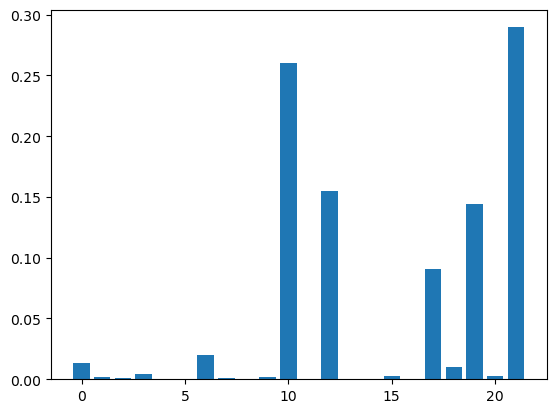

In [124]:
#xgboost DCIG
model = XGBRegressor()
model.fit(x, x_t2_scores)
normalFeatureImportance = model.feature_importances_
model.fit(x_2, t2_scores)
faultyFeatureImportance = model.feature_importances_
diff = abs(faultyFeatureImportance - normalFeatureImportance) / normalFeatureImportance
DCIC = diff / sum(diff)
print([i for i in range(kFeatures) if DCIC[i] > 1/kFeatures])
plt.bar(range(kFeatures),faultyFeatureImportance)
plt.show()

In [24]:
df_train_faulty_alarm = alarm_df(df_train_normal, df_train_faulty)
TETable = transferEntropyTable(df_train_faulty_alarm)
edges = getTableEdges(TETable, feature_list)
nodes = getNodesFromEdges(edges)
print(nodes)
print(edges)
model = BayesianNetwork(edges.remove(('xmeas_7', 'xmeas_13')))
model.fit(df_train_faulty, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)
observed_fault = {'xmeas_13': 1} 
causes = inference.map_query(variables=[nodes.remove('xmeas_13')], evidence=observed_fault)
print("Most probable causes for the observed fault:", causes)

NameError: name 'pd' is not defined

  0%|          | 0/100 [00:00<?, ?it/s]

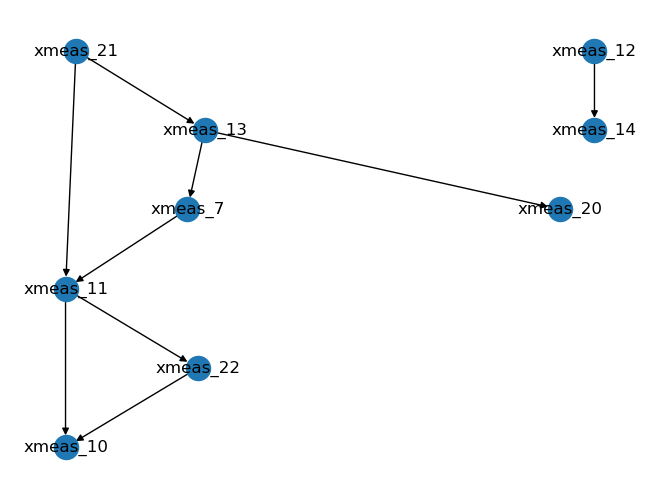

  0%|          | 0/100 [00:00<?, ?it/s]

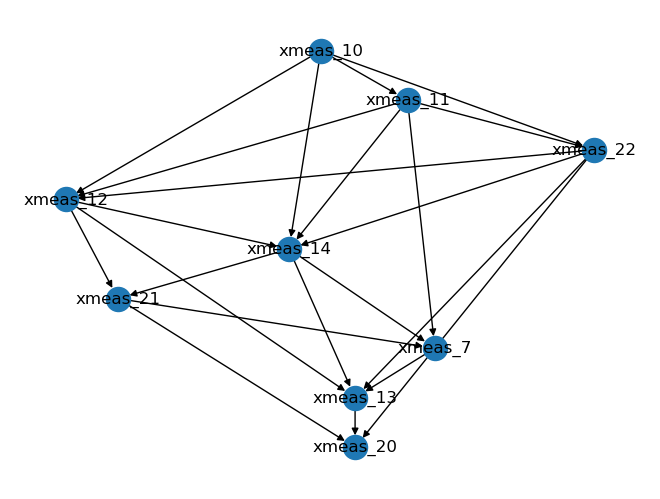

  0%|          | 0/100 [00:00<?, ?it/s]

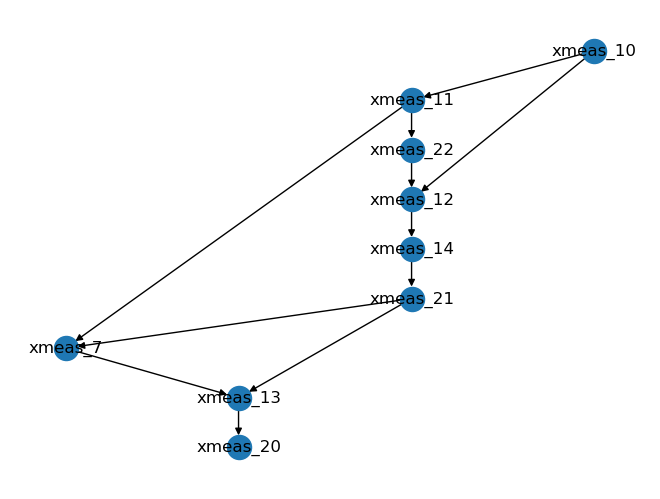

  0%|          | 0/100 [00:00<?, ?it/s]

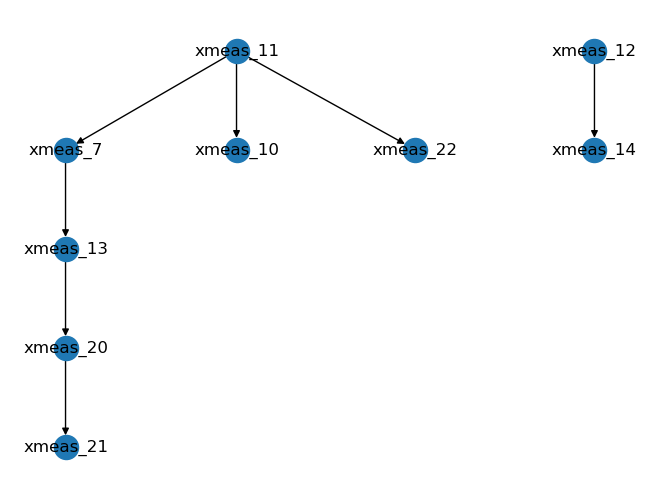

  0%|          | 0/100 [00:00<?, ?it/s]

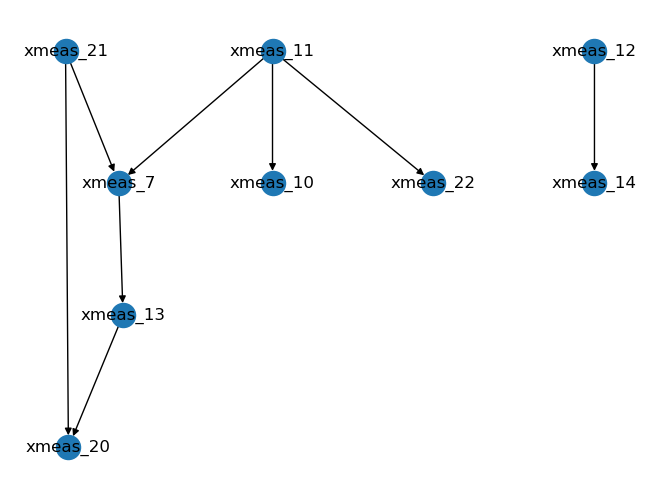

In [70]:
#fault = equal_width_bin(fault)
#fault7 = train_faulty[(train_faulty.simulationRun<10) & (train_faulty.faultNumber==7)]
#variables = ['xmeas_1', 'xmeas_4', 'xmeas_7', 'xmeas_8', 'xmeas_10', 'xmeas_20']
#variables = ['xmeas_9', 'xmeas_18', 'xmeas_20', 'xmeas_22']
#fault7 = equal_width_bin(fault7[variables])
#x2 = ss.transform(df_train_faulty)
fault = alarm_df(df_train_normal, df_train_faulty).loc[:, seperator]
#fault = x2.loc[:, stripper]
#reactor, seperator, stripper

# learn graph structure
est = HillClimbSearch(fault)
# k2score, bdeuscore, bdsscore, bicscore, aicscore
for score in ['k2score', 'bdeuscore', 'bdsscore', 'bicscore', 'aicscore']:
    best_model = est.estimate(max_iter=100, scoring_method=score, max_indegree=None)
    write_dot(best_model,'test.dot')
    pos =graphviz_layout(best_model, prog='dot')
    nx.draw(best_model, pos, with_labels=True, arrows=True)
    plt.show()

In [45]:
"""
# PC estimator, outputs a very low number of variables
from pgmpy.estimators import PC
est = PC(equal_width_bin(df_train_faulty.iloc[:, variables]))
# 0.001 has 2 edges df_train_normal[variables]
model_chi = est.estimate(significance_level=0.01)
print(len(model_chi.edges()))
nx.draw_circular(
    model_chi, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

# Funtion to evaluate the learned model structures. Not useful since we don't know the actual structure.
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_array(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_array(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)
est = PC(data=df_train_normal)
estimated_model = est.estimate(variant="stable", max_cond_vars=4)
get_f1_score(estimated_model, model)
"""

'\n# Funtion to evaluate the learned model structures. Not useful since we don\'t know the actual structure.\ndef get_f1_score(estimated_model, true_model):\n    nodes = estimated_model.nodes()\n    est_adj = nx.to_numpy_array(\n        estimated_model.to_undirected(), nodelist=nodes, weight=None\n    )\n    true_adj = nx.to_numpy_array(\n        true_model.to_undirected(), nodelist=nodes, weight=None\n    )\n\n    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))\n    print("F1-score for the model skeleton: ", f1)\nest = PC(data=df_train_normal)\nestimated_model = est.estimate(variant="stable", max_cond_vars=4)\nget_f1_score(estimated_model, model)\n'

algorithm: CAM
time elpased: 2.0196945667266846
algorithm: CCDr
time elpased: 1.1012718677520752
algorithm: GES
time elpased: 0.8000845909118652
algorithm: GIES
time elpased: 0.8049359321594238
algorithm: LiNGAM
time elpased: 0.8503768444061279
algorithm: PC
time elpased: 1.916764736175537


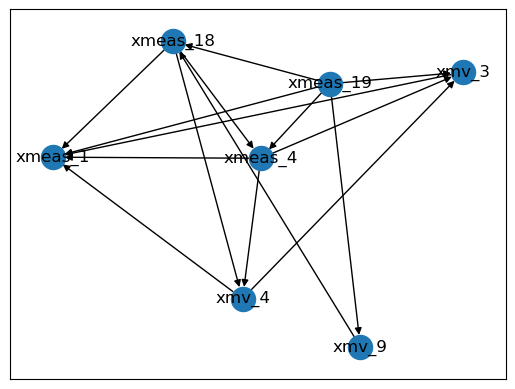

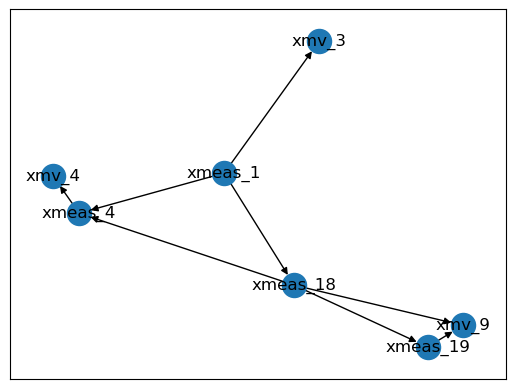

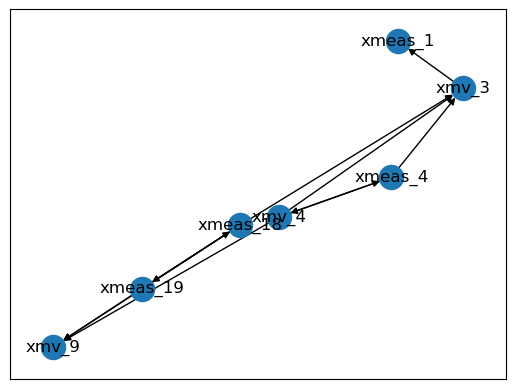

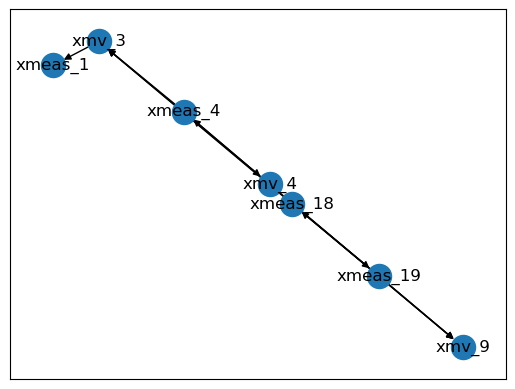

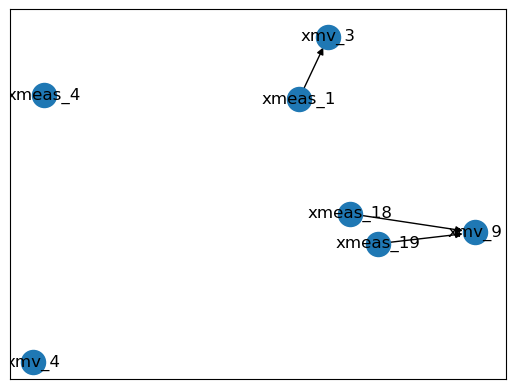

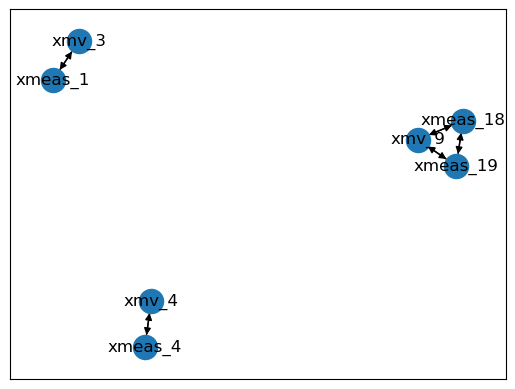

In [18]:
algorithms = [ cdt.causality.graph.CAM() # 2 mins
             , cdt.causality.graph.CCDr()
             , cdt.causality.graph.GES()
             , cdt.causality.graph.GIES()
             , cdt.causality.graph.LiNGAM()
             , cdt.causality.graph.PC()]
nalgo = len(algorithms)
for i in range(nalgo):
    algo = str(algorithms[i]).split(sep='.')[3]
    print("algorithm:", algo)
    start = time.time()
    g = algorithms[i].predict(fault7)
    end = time.time()
    print("time elpased:", end - start)
    plt.figure(algo)
    nx.draw_networkx(g, with_labels=True)
plt.show()

In [51]:
from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianNetwork(dag.edges())
model.fit(
    df_train_normal, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1
)
model.get_cpds()

[<TabularCPD representing P(xmeas_1:482) at 0x1db1432ef50>,
 <TabularCPD representing P(xmv_7:490 | xmeas_1:482) at 0x1db14600a50>,
 <TabularCPD representing P(xmv_8:490 | xmv_7:490) at 0x1db149049d0>,
 <TabularCPD representing P(xmv_3:488 | xmv_7:490) at 0x1db149076d0>,
 <TabularCPD representing P(xmv_11:479 | xmv_7:490) at 0x1db149048d0>,
 <TabularCPD representing P(xmv_6:473 | xmv_7:490) at 0x1db14905650>,
 <TabularCPD representing P(xmeas_12:462 | xmv_7:490) at 0x1db14905750>,
 <TabularCPD representing P(xmv_4:471 | xmv_7:490) at 0x1db14905b90>,
 <TabularCPD representing P(xmeas_10:462 | xmv_7:490) at 0x1db14906050>,
 <TabularCPD representing P(xmeas_4:460 | xmv_7:490) at 0x1db149062d0>,
 <TabularCPD representing P(xmeas_14:455 | xmv_7:490) at 0x1db149065d0>,
 <TabularCPD representing P(xmeas_17:451 | xmv_7:490) at 0x1db14906990>,
 <TabularCPD representing P(xmv_10:446 | xmv_7:490) at 0x1db14906d90>,
 <TabularCPD representing P(xmeas_8:441 | xmv_7:490) at 0x1db14907450>,
 <TabularC

In [52]:
# Analyse distribution of variables, e.g. normally distributed with normality test like Anderson-Darling Test
from scipy.stats import anderson

# Create header for tabular output
print(f"{'DISTRIBUTION':<15}{'%sig':<10}{'stat':<12}{'crit-val':<10}"
      f"{'result':<10}\n")

# Loop through all continuous random variables and test them
for var in df_train_normal.columns:
    test = anderson(df_train_normal[var])
    # Loop through test results and unpack the sig.levels and crit-vals
    for i in range(len(test.critical_values)):
        sig_lev, cv = test.significance_level[i], test.critical_values[i]
        # Check if test.stat is < crit-val
        result = 'Fail to reject' if test.statistic < cv else 'Reject'
        # Print results in tabular format
        print(f"{var:<15}{sig_lev:<10}{test.statistic:<12.3f}{cv:<10}"
              f"{result:<10}")  
        if i is 4:
            print('\n')

DISTRIBUTION   %sig      stat        crit-val  result    

xmeas_1        15.0      0.661       0.571     Reject    
xmeas_1        10.0      0.661       0.651     Reject    
xmeas_1        5.0       0.661       0.781     Fail to reject
xmeas_1        2.5       0.661       0.911     Fail to reject
xmeas_1        1.0       0.661       1.083     Fail to reject


xmeas_2        15.0      0.634       0.571     Reject    
xmeas_2        10.0      0.634       0.651     Fail to reject
xmeas_2        5.0       0.634       0.781     Fail to reject
xmeas_2        2.5       0.634       0.911     Fail to reject
xmeas_2        1.0       0.634       1.083     Fail to reject


xmeas_3        15.0      0.828       0.571     Reject    
xmeas_3        10.0      0.828       0.651     Reject    
xmeas_3        5.0       0.828       0.781     Reject    
xmeas_3        2.5       0.828       0.911     Fail to reject
xmeas_3        1.0       0.828       1.083     Fail to reject


xmeas_4        15.0      0.33

<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\paulo\AppData\Local\Temp\ipykernel_6696\859025840.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 4:


Success=0.25000000000000006
Failure=0.75
